# Введение в искусственные нейронные сети
# Урок 6. Сегментация

## Содержание методического пособия:


<ol>
<li>Что такое сегментация изображения</li>
<li>Виды архитектур для сегментации изображений</li>
<li>Практический пример сегментации</li>
</ol>

## Что такое сегментация изображения

В компьютерное зрении есть несколько основых видов задач. Это такие задачи как классификация, сегментация и детектирование объектов.

До сих пор задачи в области комп. зрения с которыми мы сталкивались относились к задаче классификации. Эта задача подразумевает получения предсказания от нейронной сети названия класса объекта, который ей представлен на изображении. 

Для продвинутого компьютерного зрения как правило требуется не только знать, что за объект находится на изображении, но и где он находится, какой этот объект формы и т.д. Данные задачи и призваны решить нейронные сети для сегментации и нейронные сети для дектирования объектов. 


В этом уроке мы познакомимся с задачей сегментации. **Сегментация** изображения подразумевает отнесение каждого пикселя изображения к определенному классу. Т.е. по сути мы получаем маску изображения.

Классов может быть два: нужный объект и задний фон.
<img src='https://drive.google.com/uc?export=view&id=1IMsH3ybqrSvO0I3_WBt31xocA2Qkc-6k' width=400>

Или классов может быть несколько:
<img src='https://drive.google.com/uc?export=view&id=1tPR3UbNx4V445vnY7I7PfkQl8GdbmZyO' width=550>


Нейронные сети для сегментирования изображений находят широкое применение в беспилотном транспорте, "умном" видеонаблюдении, медицине и др. областях.


Сегментация дорожной сцены:
<img src='https://drive.google.com/uc?export=view&id=13WRvBVLPoydKeS7VpLhB9JDkKmkez-qZ' width=500>


Сегментация спутниковых снимков для распознавания деревьев:
<img src='https://drive.google.com/uc?export=view&id=1hfRKin8zbWcK27w5abuNHsWJentt2R4u' width=600>

**Semantic и Instance Сегментация**

Целью семантической сегментации изображения является маркировка каждого пикселя изображения.

Сегментация экземпляров на один шаг впереди семантической сегментации, в которой наряду с классификацией на уровне пикселей мы ожидаем, что компьютер будет классифицировать каждый экземпляр класса отдельно.

<img src='https://drive.google.com/uc?export=view&id=1fIZ15wwBQ6BpsLmbql1oPxwcABQb0Pmi'>

Для тренировки нейронных сетей решающих задачу сегментирования применяются свои специальные датасеты, в которых размечена маска изображения, например, такие как [PASCAL Visual Object Classes](http://host.robots.ox.ac.uk/pascal/VOC/) или [COCO (Common Objects in Context)](https://cocodataset.org/). Датасетов для сегментации меньше и они сложнее в составлении. Поэтому существует распространенная практика использования предобученнной нейронной сети, например, на ImageNet, в качестве части отвественной за восприятие объектов. Затем уже нейронная сеть доубучается на размеченных масках с помощью специальных датасетов.

Иногда маски не хранят в растровом представлении, а используют маску в закодированном в последовательность виде, к примеру, RLE (run-length encoding, кодирование длин серий) — алгоритм сжатия данных, заменяющий повторяющиеся символы (серии) на один символ и число его повторов. Серией называется последовательность, состоящая из нескольких одинаковых символов.
 

In [ ]:
def rle_decode(mask_rle, shape=(1080, 512, 1)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)

    s = mask_rle.split()
    # print(s)
    # print(s[0:][::2], s[1:][::2])
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1

    ends = starts + lengths    
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
        
    img = img.reshape(shape)
    return img

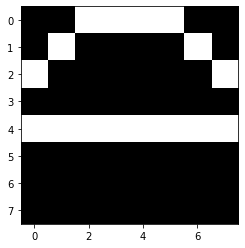

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


rle_string = '3 4 10 1 15 1 17 1 24 1 33 8'

mask = rle_decode(rle_string, shape=(8, 8))
plt.imshow(mask.reshape(8, 8), cmap='gray');

## Виды архитектур для сегментации изображений


Чтобы перейти от задачи классификации к сегментации достаточно взять последнюю свертку и отмасштабировать её до нужного нам размера, к примеру, возьмем тензор 14х14х512 и переведем в 224х224х512, но он будет иметь каналов больше, чем нам нужно, поэтому применем к нему свертку с одним фильтром.

<img src='https://drive.google.com/uc?export=view&id=1j35v8z17TD6RgVTp2DoEokkCt44x71If' width=550>

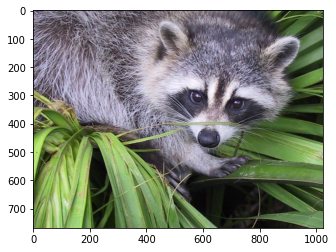

In [ ]:
from scipy import misc
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.fromarray(misc.face())
plt.imshow(img);

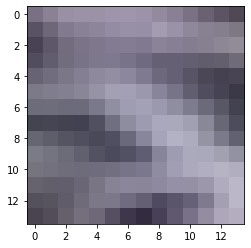

In [ ]:
crop_img = img.crop((0, 0, 14, 14))
plt.imshow(crop_img);

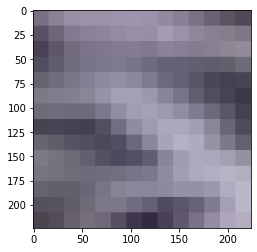

In [ ]:
resized_img = crop_img.resize((224, 224), resample=Image.NEAREST)
plt.imshow(resized_img);

Результат получается не очень, всё пиксилизировано и не качественно. Но можно сделать более качественное масштабирование, не просто брать ближайший пиксель и копировать его, а использовать линейную интерполяцию.

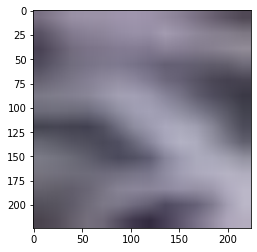

In [ ]:
resized_img = crop_img.resize((224, 224), resample=Image.BILINEAR)
plt.imshow(resized_img);

В общем виде, так выглядит архитектура большинства сетей для сегментации. Левая сторона модели Encoder представляет из себя любую сеть извлечения признаков, обученную для классификации изображений.
Вторая часть - Decoder состоит из слоев upsampling'а или деконволюций (повышения размерности). Повышать размерность можно просто «вытягивая» по высоте и ширине наш feature map.

<img src='https://drive.google.com/uc?export=view&id=1ENmQ_E-Xq59HSMCKa1b61swPKfjlgasr'>

Для того чтобы выделенные объекты соответствовали оригинальному масштабу, уменьшенное изображение требуется вернуть к изначальному размеру. Слой upsample выполняет увеличение изображения.

Так мы получаем симметричную архитектуру. Между слоями увеличения размеров изображения также помещаются свёрточные слои, но количество выходов с них постепенно уменьшается.

Последовательность upsample-convolution необходима, чтобы привести изображение к исходным размерам, при этом сократив количество возможных каналов изображения до количества искомых групп объектов.

**Слой UpSample**

<img src='https://drive.google.com/uc?export=view&id=1eZdTgyNAWp3KtuAlqnrPWjF1MZM50MiW' width=500>

In [ ]:
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D

Как ранее уже было упомянуто архитектур для решения задачи сегментации существует много и продолжают появляться новые. Мы рассмотрим такие архитектуры как FCN (fully convolutional network), SegNet, U-net, Mask-RCNN. Данные архитектуры отражают основные вехи в эволюции архитектур нейронных сетей для решения задачи сегментации. Также мы рассмотрим архитектуру Autoencoder, которую полезно рассмотреть как вводную часть к большинству архитектур в области сегментации изображениий.

Рассмотрим, как работает Conv2DTranspose.

In [ ]:
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Conv2DTranspose, UpSampling2D
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
# 1 channel - 4 + 4 + 4
# 2 channel - 4 + 4 + 4
# 3 channel - 4 + 4 + 4
            # 1   1   1
4 * 9 + 3

39

In [ ]:
model = Sequential([
    Conv2DTranspose(3, (2, 2), strides=(1, 1), padding='same', input_shape=(224, 224, 3))
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 224, 224, 3)      39        
 nspose)                                                         
                                                                 
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


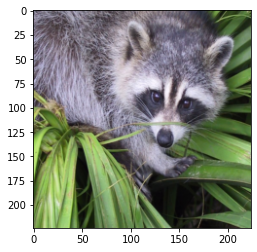

In [ ]:
resized_img = img.resize((224, 224), resample=Image.BILINEAR)
resized_img = np.array(resized_img) / 255.0
plt.imshow(resized_img);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


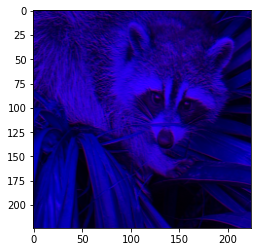

In [ ]:
predicted_img = model.predict(resized_img[None])[0]
plt.imshow(predicted_img);

In [ ]:
model = Sequential([
    Conv2DTranspose(3, (2, 2), strides=(2, 2), input_shape=(224, 224, 3))
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_1 (Conv2DT  (None, 448, 448, 3)      39        
 ranspose)                                                       
                                                                 
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


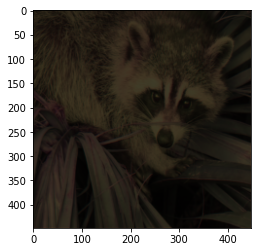

In [ ]:
predicted_img = model.predict(resized_img[None])[0]
plt.imshow(predicted_img);

А теперь посмотрим на слой Upsampling.

In [ ]:
model = Sequential([
    UpSampling2D(size=(2, 2), interpolation='bilinear', input_shape=(224, 224, 3))
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2D  (None, 448, 448, 3)      0         
 )                                                               
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


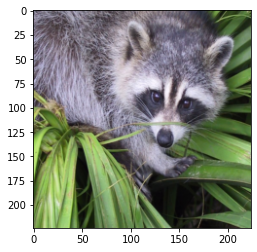

In [ ]:
plt.imshow(resized_img);

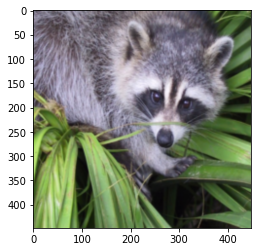

In [ ]:
predicted_img = model.predict(resized_img[None])[0]
plt.imshow(predicted_img);

### FCN (fully convolutional network)

Данная архитектура появилась в 2014 г., буквально через несколько лет после того, как глубокое обучение получило широкое распространение.

FCN в отличие от обычной CNN не имеет на конце полносвязных слоев, вместо этого на конце нейронной сети располагается модуль, который позволяет увеличить то представление изображения, которое имеют обычные CNN перед передачей данных в полносвязные слои.


<img src='https://drive.google.com/uc?export=view&id=1j35v8z17TD6RgVTp2DoEokkCt44x71If' width=550>

### Autoencoder



Прежде чем, мы разберем архитектуру SegNet, давайте посмотрим на Автоэнкодер. Данная архитектура представляет из себя набор слоев, которые сжимают входящие данные во все более маленькое представление, а также слоев, которые разжимают затем эти данные. 

**Автоэнкодеры** — это нейронные сети прямого распространения, которые восстанавливают входной сигнал на выходе. Внутри у них имеется скрытый слой, который представляет собой описательное представление картинки. Автоэнкодеры конструируются таким образом, чтобы не иметь возможность точно скопировать вход на выходе.

Если после такой процедуры сжатия и разжатия, удается получить на выходе изначальные данные, значит в центральных слоях данной архитектуры располагается сжатое представление данных. Отбросив вторую, разжимающую данные, часть, можно использовать сжатые данные для различных целей.

<img src='https://drive.google.com/uc?export=view&id=1GwfDua-4m7D3sW1eycPjr58YrRkyLNc0'>

Перейдем к архитектуре автоэнкодера.

In [ ]:
def Autoencoder(input_size=(28, 28, 1)):
    img_input = Input(input_size)

    x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)

    # 14x14 
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)


    # 7x7
    x = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
     
 
    # 14x14
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    
    # 28x28
    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x)
    
    model.compile(optimizer=Adam(),
                  loss='mean_squared_error')

    return model

In [ ]:
from keras.datasets import mnist


(X_train, y_train), (X_test, y_test) = mnist.load_data()

noice = 0.5

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

y_train_pix = X_train.copy()
y_test_pix = X_test.copy()

X_train += np.random.randn(X_train.shape[0],
                           X_train.shape[1],
                           X_train.shape[2],
                           X_train.shape[3]) * noice

X_test += np.random.randn(X_test.shape[0],
                          X_test.shape[1],
                          X_test.shape[2],
                          X_test.shape[3]) * noice

11501568/11490434 [==============================] - 0s 0us/step


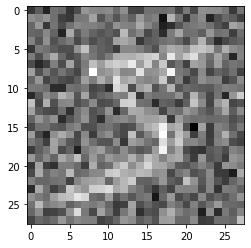

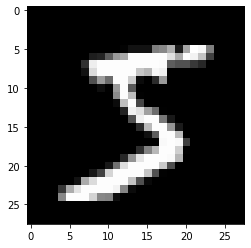

In [ ]:
plt.imshow(X_train[0, ..., 0], cmap='gray')
plt.show()
plt.imshow(y_train_pix[0, ..., 0], cmap='gray')
plt.show()

In [ ]:
autoencoder = Autoencoder(input_size=(28, 28, 1))
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0     

In [ ]:
hist = autoencoder.fit(X_train[:10000],
                       y_train_pix[:10000],
                       epochs=10,
                       batch_size=200,
                       validation_data=(X_test, y_test_pix))

Epoch 1/10
50/50 [==============================] - 9s 126ms/step - loss: 0.0615 - val_loss: 0.0984
Epoch 2/10
50/50 [==============================] - 7s 136ms/step - loss: 0.0191 - val_loss: 0.1033
Epoch 3/10
50/50 [==============================] - 7s 135ms/step - loss: 0.0148 - val_loss: 0.0968
Epoch 4/10
50/50 [==============================] - 6s 112ms/step - loss: 0.0129 - val_loss: 0.1007
Epoch 5/10
50/50 [==============================] - 6s 112ms/step - loss: 0.0118 - val_loss: 0.1456
Epoch 6/10
50/50 [==============================] - 6s 112ms/step - loss: 0.0112 - val_loss: 0.1501
Epoch 7/10
50/50 [==============================] - 6s 112ms/step - loss: 0.0107 - val_loss: 0.0951
Epoch 8/10
50/50 [==============================] - 6s 112ms/step - loss: 0.0104 - val_loss: 0.0534
Epoch 9/10
50/50 [==============================] - 7s 136ms/step - loss: 0.0102 - val_loss: 0.0216
Epoch 10/10
50/50 [==============================] - 7s 135ms/step - loss: 0.0099 - val_loss: 0.0148

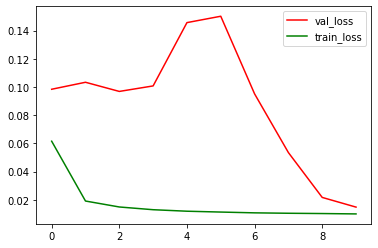

In [ ]:
plt.plot(hist.history['val_loss'], 'r', label='val_loss')
plt.plot(hist.history['loss'], 'g', label='train_loss')
plt.legend()
plt.show()

In [ ]:
y_pred = autoencoder.predict(X_test)

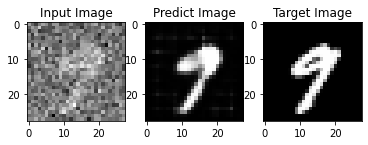

In [ ]:
idx = 20

fig, ax = plt.subplots(1, 3)

ax[0].imshow(X_test[idx, ..., 0], cmap='gray')
ax[0].set_title('Input Image')

ax[1].imshow(y_pred[idx, ... ,0], cmap='gray')
ax[1].set_title('Predict Image')

ax[2].imshow(y_test_pix[idx, ..., 0], cmap='gray')
ax[2].set_title('Target Image')

plt.show()

В целом, такое автоэнкодер может убирать шумы и с других изображений.

In [ ]:
from keras.datasets import fashion_mnist


(X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion) = fashion_mnist.load_data()

noice = 0.3

X_train_fashion = X_train_fashion / 255.0

X_train_fashion = X_train_fashion.reshape(X_train_fashion.shape[0], 28, 28, 1)

X_train_fashion += np.random.randn(X_train_fashion.shape[0],
                                   X_train_fashion.shape[1],
                                   X_train_fashion.shape[2],
                                   X_train_fashion.shape[3]) * noice

4431872/4422102 [==============================] - 0s 0us/step


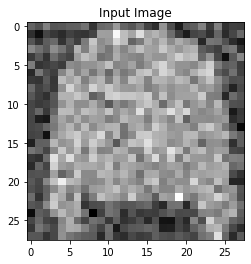

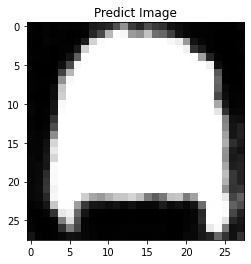

In [ ]:
y_pred = autoencoder.predict(X_train_fashion[:20])
N = 7
plt.imshow(X_train_fashion[N, ..., 0], cmap='gray')
plt.title('Input Image')
plt.show()
plt.imshow(y_pred[N, ..., 0], cmap='gray')
plt.title('Predict Image')
plt.show()

### SegNet

SegNet появилась в 2015 г. Данная архитектура состоит из конволюционной и деконволюционной части. Она отчасти повторяет собой архитектуру Autoencoder, где есть кодирующая и декодирующая часть. 

Декодирующая часть в SegNet позволяет сделать более плавное разворачивание изображения после того как отработала сверточная часть архитектуры. Благодаря этому границы объектов на изображение определяются более корректно.

Стоит отметить, что в качестве сверточной части могут использоваться различные предтренерованные нейронные сети для решения задач классификации, например различные модификации VGG и ResNet.

<img src='https://drive.google.com/uc?export=view&id=1YRgQtgX90Y0YTuSRrDZfOr_qyEsVi6ax'>

### U-Net

U-net появился в 2015 г. для решения медицинский задач. Данная архитектура и ее модификации являются одним из основых практических инструментов для решения современных задач сегментации изображений. Данная архитектура отличается более высокой степенью точности сегментирования, достачной для работы с мед. снимками, картами, где располагаются множество мелких объектов и других задач.


<img src='https://drive.google.com/uc?Export=view&id=1B_SOnL99Qwc-Yrka0kK7V5dTH3mJQZwN' width=700>


U-net также как и SegNet берет вход и реконструирует выход как сегментированную карту изображения. Однако в данной архитектуре используются skip connection, похожие на те, что помогли решить проблему исчезающего градиента в задача классификации (ResNet архитектура). Данные skip connections позволяют сигналу не только проходить строго, сначала по нисходящей лестницы слоев, а потом по восходящей лестнице апсемплинга(увеличение маленькой репрезентации изображения в полноценную карту), но и также перескакивать между слоями одного уровня, что в частности решает проблему дублирования функций слоев и улучшает эффективность обучения.

<img src='https://drive.google.com/uc?export=view&id=1f3za1M3fCTbmze4DZIi5FQWgdmxzZQ9I' width=400>

### FPN (The Feature Pyramid Network)

Данная архитектура появилась в 2017 г. Визуально, данная архитектура похожа на пирамиду. Она может применяться как для задач детектирования объектов, так и для задач сегментации изображений. FPN во многом похожа на U-Net, однако есть одно важное нововведение - предсказания снимаются не только с самой высокой части апсемплинга, но и на каждой ступени начинающейся в фазе декодирования. Это позволяет совершать детекцию на разных масштабах восстанавливаемого изображения, что положительно сказываеться на точности сегментирования.


<img src='https://drive.google.com/uc?export=view&id=1NyLWW644oRNLi-liw_jeRt6wbgBocQFR'>

## Практический пример сегментации

Можете отсюда скачать датасет: https://drive.google.com/file/d/1z0eATIZNn4vGt_ioS8N4mb1EZgEs40Sv/view?usp=sharing

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1z0eATIZNn4vGt_ioS8N4mb1EZgEs40Sv' -O small_segment.rar

--2022-02-22 16:39:29--  https://drive.google.com/uc?export=download&id=1z0eATIZNn4vGt_ioS8N4mb1EZgEs40Sv
Resolving drive.google.com (drive.google.com)... 142.250.157.113, 142.250.157.102, 142.250.157.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.157.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oectts7fg86pglvbski2e4qmf49tjgeu/1645547925000/14904333240138417226/*/1z0eATIZNn4vGt_ioS8N4mb1EZgEs40Sv?e=download [following]
--2022-02-22 16:39:33--  https://doc-0o-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oectts7fg86pglvbski2e4qmf49tjgeu/1645547925000/14904333240138417226/*/1z0eATIZNn4vGt_ioS8N4mb1EZgEs40Sv?e=download
Resolving doc-0o-c0-docs.googleusercontent.com (doc-0o-c0-docs.googleusercontent.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to doc-0o-c0-docs.googleusercontent.com (doc-0o-c0

In [ ]:
!pip install rarfile
import rarfile

rf = rarfile.RarFile("small_segment.rar")
for f in rf.infolist():
    print(f.filename, f.file_size)
    if f.filename == "README":
        print(rf.read(f))
rf.extractall()

labels/00_000200.png 19401
labels/00_000400.png 14502
labels/00_000600.png 19818
labels/00_000800.png 13554
labels/00_001000.png 14496
labels/00_001200.png 17371
labels/00_001400.png 12431
labels/00_001600.png 16390
labels/00_001800.png 16646
labels/00_002000.png 14844
labels/00_002200.png 14011
labels/00_002400.png 16921
labels/00_002600.png 15822
labels/00_002800.png 13681
labels/00_003000.png 13980
labels/00_003200.png 15122
labels/00_003400.png 13978
images/00_000200.png 791603
images/00_000400.png 816531
images/00_000600.png 862976
images/00_000800.png 836923
images/00_001000.png 829576
images/00_001200.png 822001
images/00_001400.png 858981
images/00_001600.png 797385
images/00_001800.png 850589
images/00_002000.png 818966
images/00_002200.png 641760
images/00_002400.png 714888
images/00_002600.png 774166
images/00_002800.png 890605
images/00_003000.png 837876
images/00_003200.png 755342
images/00_003400.png 695524
labels/ 0
images/ 0


**Загружаем и уменьшаем картинки**

Можно обойтись исходным размером или взять другой, размер по обеим сторонам должен делиться на 2 несколько раз (сколько будет сжатий кадра).

In [ ]:
from pathlib import Path


path_imgs = '/content/images/'
path_masks = '/content/labels/'

imgs_paths = list(Path(path_imgs).iterdir())
masks_paths = list(Path(path_masks).iterdir())

In [ ]:
from keras.preprocessing import image
images = []
masks = []
image_size = (200, 600)


for i_img, i_mask in zip(imgs_paths, masks_paths):
    images.append(image.load_img(i_img, target_size=image_size))
    masks.append(image.load_img(i_mask, target_size=image_size))

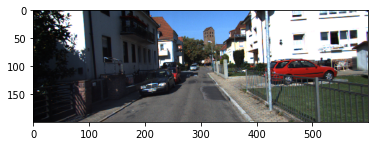

In [ ]:
plt.imshow(images[1].convert('RGBA'))
plt.show()

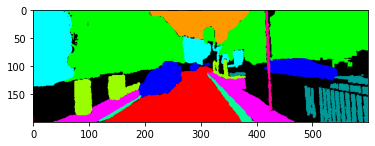

In [ ]:
plt.imshow(masks[1].convert('RGBA'))
plt.show()

**Создаём обучающую выборку**

In [ ]:
X = []

for img in images:
  x = image.img_to_array(img)
  X.append(x)

X = np.array(X)

In [ ]:
print(X.shape)

(17, 200, 600, 3)


Построим цвет , воспринимаемого диапазона для сегментированной картинки - это результат разметки.

Color Coding:

Name	(r,g,b)	    Class mapping

Car	  ( 0, 0,255)	Object

Road	(255, 0, 0)	Road

Mark	(255,255, 0)	Road

Building	( 0,255, 0)	Building

Sidewalk	(255, 0,255)	Road

Tree/Bush	( 0,255,255)	Tree/Bush

Pole	(255, 0,153)	Sign/Pole

Sign	(153, 0,255)	Sign/Pole

Person	( 0,153,255)	Object

Wall	(153,255, 0)	Building

Sky	(255,153, 0)	Sky

Curb	( 0,255,153)	Road

Grass/Dirt	( 0,153,153)	Grass/Dirt

Void	( 0, 0, 0)	Void



Делаем конвертер в one-hot_encoding для выходных примеров

In [ ]:
import cv2


def Color2index(y):
    arr_col = [
        [0,0,255],
        [255,0,0],
        [255,255,0],
        [0,255,0],
        [255,0,255],
        [0,255,255],
        [255,0,153],
        [153,0,255],
        [0,153,255],
        [153,255,0],
        [255,153,0],
        [0,255,153],
        [0,153,153],
        [0,0,0]
    ]
    y_ind = np.zeros((y.shape[0], y.shape[1]))
    y_cat = np.zeros((y.shape[0], y.shape[1], len(arr_col)))
    i = 1
    for i_color in arr_col:
        ind_i = np.where(
            (y[..., 0] == i_color[0]) 
            & (y[..., 1] == i_color[1])
            & (y[..., 2] == i_color[2])
        )
        y_ind[ind_i[0], ind_i[1]] = i
        y_cat[ind_i[0], ind_i[1], i-1] = 1 
        i += 1
    
    return y_cat, y_ind#, i-1

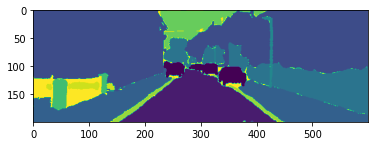

In [ ]:
cat_yi, ind_yi = Color2index(image.img_to_array(masks[0]))
plt.imshow(ind_yi)
plt.show()  

In [ ]:
ind_yi

array([[4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.],
       ...,
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.]])

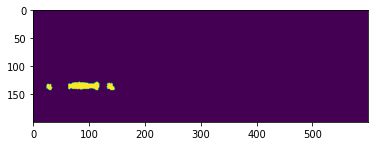

In [ ]:
plt.imshow(cat_yi[..., 12])
plt.show()

In [ ]:
cat_yi.shape

(200, 600, 14)

Сегментированную картинку в  One hot encoding (разметка на 14 классов)

In [ ]:
y = []

for mask in masks:
  y_cat, _ = Color2index(image.img_to_array(mask))
  y.append(y_cat)

y = np.array(y)

In [ ]:
print(y.shape)

(17, 200, 600, 14)


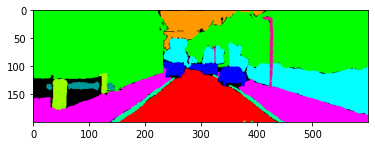

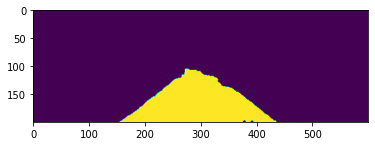

In [ ]:
n = 0
plt.imshow(masks[n].convert('RGBA'))
plt.show()
img = y[n][..., 1]

plt.imshow(img)
plt.show()

Делим на тест и трейн по числу N

In [ ]:
N = 13
y_train = y[:N, ...]
X_train = X[:N, ...]

y_test = y[N:, ...]
X_test = X[N:, ...]

In [ ]:
y_test.shape

(4, 200, 600, 14)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(13, 200, 600, 3)
(13, 200, 600, 14)


### Коэффициент DICE

* Dice может использоваться для попиксельного сравнения между предсказанной маской и истинной маской
* Dice - это площадь пересечения дважды, деленная на общее количество пикселей на двух картинках

<img src='https://miro.medium.com/max/429/1*yUd5ckecHjWZf6hGrdlwzA.png' width=200>

Формула подсчета:

<center> $ \huge \frac{2*|X∩Y|}{|X|+|Y|}$ </center>

<br>

где X - это предсказанное множество пикселей, а Y - истина.
* Dice будет равен 1, когда X и Y пустые.

In [ ]:
import keras.backend as K


def dice_coef(y_true, y_pred):
    return (2. * K.sum(y_true * y_pred)) / (K.sum(y_true) + K.sum(y_pred))

In [ ]:
# def dice_coef(mask1, mask2):
#     intersect = np.sum(mask1 * mask2)
#     fsum = np.sum(mask1)
#     ssum = np.sum(mask2)
#     dice = (2 * intersect) / (fsum + ssum)
#     return dice    

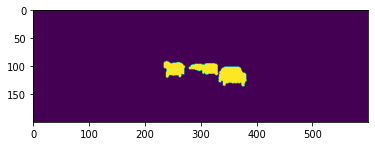

In [ ]:
mask = y[0, ..., 0]
plt.imshow(mask);

Dice Coefficient of two same masks are 1.0


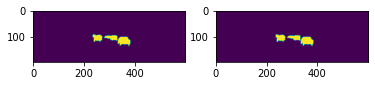

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(mask)
ax[1].imshow(mask)
print(f"Dice Coefficient of two same masks are {dice_coef(mask, mask)}")

Теперь сдвинем одну маску на 5 пикселей вниз.

In [ ]:
# We are just shifting the images towards the bottom to keep it simple
def return_shifted(mask, shift=5):
    nmask = np.zeros((mask.shape[0] + shift, mask.shape[1]))
    nmask[shift:, :] = mask
    nmask = nmask[:-shift, :]
    return nmask

Dice Coefficient of two same masks are 0.7593728698023177


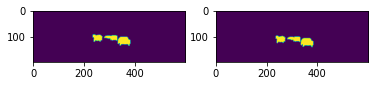

In [ ]:
sh_mask = return_shifted(mask, shift=5)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(mask)
ax[1].imshow(sh_mask)
print(f"Dice Coefficient of two same masks are {dice_coef(mask, sh_mask)}")

На 50 пикселей вниз.

Dice Coefficient of two same masks are 0.0


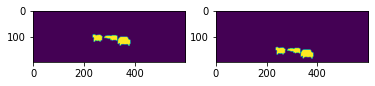

In [ ]:
sh_mask = return_shifted(mask, shift=50)


fig, ax = plt.subplots(1, 2)
ax[0].imshow(mask)
ax[1].imshow(sh_mask)
print(f"Dice Coefficient of two same masks are {dice_coef(mask, sh_mask)}")

**Создаём и обучаем U-net**

In [ ]:
from keras.layers import (Activation, Input, MaxPooling2D, BatchNormalization, 
                          Conv2D, Conv2DTranspose, concatenate)
from tensorflow.keras.utils import plot_model


def Unet(num_classes=14, input_shape=(200, 600, 3)):
    img_input = Input(input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', name='block1_conv1')(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same', name='block1_conv2')(x)
    x = BatchNormalization()(x)

    # запомним тензор для переноса
    block_1_out = Activation('relu')(x)

    x = MaxPooling2D()(block_1_out)


    # Block 2
    x = Conv2D(128, (3, 3), padding='same', name='block2_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding='same', name='block2_conv2')(x)
    x = BatchNormalization()(x)

    # запомним тензор для переноса
    block_2_out = Activation('relu')(x)

    x = MaxPooling2D()(block_2_out)


    # Block 3
    x = Conv2D(256, (3, 3), padding='same', name='block3_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv3')(x)
    x = BatchNormalization()(x)

    # запомним тензор для переноса
    block_3_out = Activation('relu')(x)

    x = MaxPooling2D()(block_3_out)


    # Block 4
    x = Conv2D(512, (3, 3), padding='same', name='block4_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv3')(x)
    x = BatchNormalization()(x)

    # запомним тензор для переноса
    block_4_out = Activation('relu')(x)

 
    # UP 1
    x = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_3_out])
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 2
    x = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_2_out])
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 3
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_1_out])
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)


    # слой классификатор
    x = Conv2D(num_classes, (3, 3), activation='softmax', padding='same')(x)

    model = Model(img_input, x)
    return model

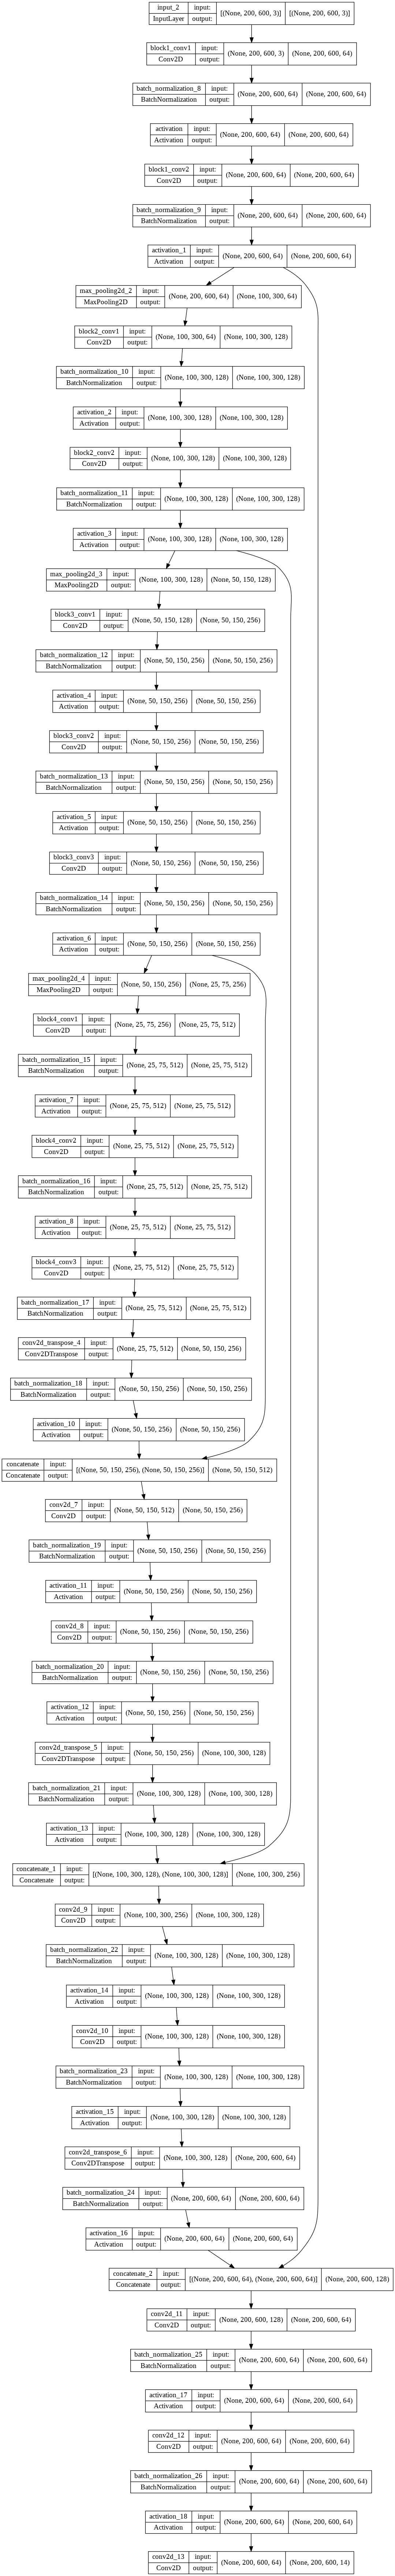

In [ ]:
model_1 = Unet(14, (200, 600, 3))

plot_model(model_1, to_file='model_1.png', show_shapes=True)

In [ ]:
from tensorflow.keras.optimizers import Adam


model_1.compile(optimizer=Adam(),
                loss='categorical_crossentropy',
                metrics=[dice_coef])
model_1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200, 600, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 200, 600, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 200, 600, 64  256        ['block1_conv1[0][0]']           
 rmalization)                   )                                                           

### Custom Callback

In [ ]:
sample_image = X_test[0]
sample_mask = y_test[0]

In [ ]:
import keras
from IPython.display import clear_output


def show_predictions(model):
    pred_mask = model.predict(sample_image[None])[..., 0]
    print(pred_mask.shape)

    fig, ax = plt.subplots(1, 3, figsize=(15, 8))

    ax[0].imshow(sample_image / 255.0)
    ax[1].imshow(sample_mask[..., 0])
    ax[2].imshow(np.squeeze(pred_mask, axis=0))
    plt.show()


class DisplayCallback(keras.callbacks.Callback):
    def __init__(self, patience=1):
        super().__init__()
        self.patience = patience
    
    def on_train_begin(self, logs=None):
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        self.wait += 1
        if self.wait >= self.patience:
            clear_output(wait=True)
            show_predictions(self.model)
            print(f'\nSample Prediction after epoch {epoch+1}')
            self.wait = 0

(1, 200, 600)


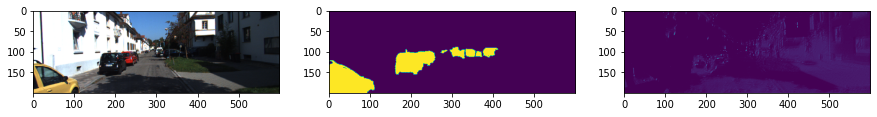

In [ ]:
show_predictions(model_1)

(1, 200, 600)


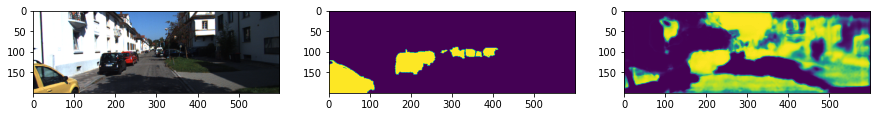


Sample Prediction after epoch 20
13/13 [==============================] - 6s 508ms/step - loss: 0.5407 - dice_coef: 0.7276 - val_loss: 2.2029 - val_dice_coef: 0.4665


In [ ]:
history = model_1.fit(X_train, y_train,
                      epochs=20,
                      batch_size=1,
                      validation_data=(X_test, y_test),
                      callbacks=[DisplayCallback(patience=5)])

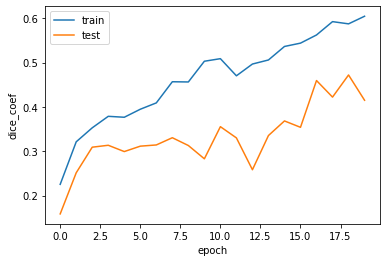

In [ ]:
plt.plot(history.history['dice_coef'], label='train')
plt.plot(history.history['val_dice_coef'], label='test')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('dice_coef')
plt.show()

In [ ]:
pred = model_1.predict(X_test)
print(pred.shape)

(4, 200, 600, 14)


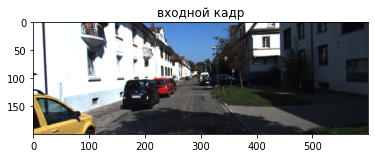

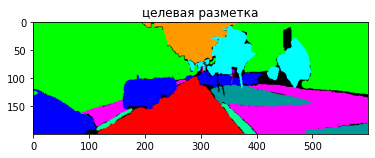

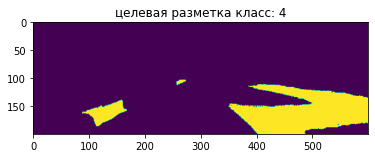

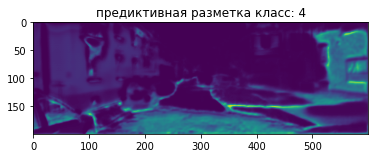

In [ ]:
n = 0
class_ = 4
plt.imshow(images[N + n].convert('RGBA'))
plt.title('входной кадр')
plt.show()
plt.imshow(masks[N + n].convert('RGBA'))
plt.title('целевая разметка')
plt.show()
img = y_test[n][..., class_]
plt.imshow(img)
plt.title('целевая разметка класс: ' + str(class_))
plt.show()
img = pred[n][..., class_]
plt.imshow(img)
plt.title('предиктивная разметка класс: ' + str(class_))
plt.show()

**Претренированная  Unet**

In [ ]:
from tensorflow.keras.applications import VGG16
pre_trained_model = VGG16(input_shape=X_test.shape[1:], include_top=False, weights='imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 600, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 600, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 600, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 300, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 300, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 300, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 150, 128)      0     

In [ ]:
def unet_pre_train(num_classes=13, input_shape=(200, 600, 3)):    
    pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights='imagenet')

    for layer in pre_trained_model.layers[:-5]:
        layer.trainable = False

    x = pre_trained_model.layers[13].output
    block_4_out = pre_trained_model.layers[10].output
    block_3_out = pre_trained_model.layers[6].output
    block_2_out = pre_trained_model.layers[3].output
    img_input = pre_trained_model.inputs
    print(block_4_out)
    print(block_3_out)
    print(block_2_out)
   
    # UP 1

    # добавили перенос из VGG16
    x = concatenate([x, block_4_out])
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)


    # UP 2
    x = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # добавили перенос из VGG16
    x = concatenate([x, block_3_out])
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)


    # UP 3
    x = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # добавили перенос из VGG16
    x = concatenate([x, block_2_out])
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)


    # UP 4
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(num_classes, (3, 3), activation='softmax', padding='same')(x)

    model = Model(img_input, x)
    return model

KerasTensor(type_spec=TensorSpec(shape=(None, 25, 75, 256), dtype=tf.float32, name=None), name='block3_pool/MaxPool:0', description="created by layer 'block3_pool'")
KerasTensor(type_spec=TensorSpec(shape=(None, 50, 150, 128), dtype=tf.float32, name=None), name='block2_pool/MaxPool:0', description="created by layer 'block2_pool'")
KerasTensor(type_spec=TensorSpec(shape=(None, 100, 300, 64), dtype=tf.float32, name=None), name='block1_pool/MaxPool:0', description="created by layer 'block1_pool'")


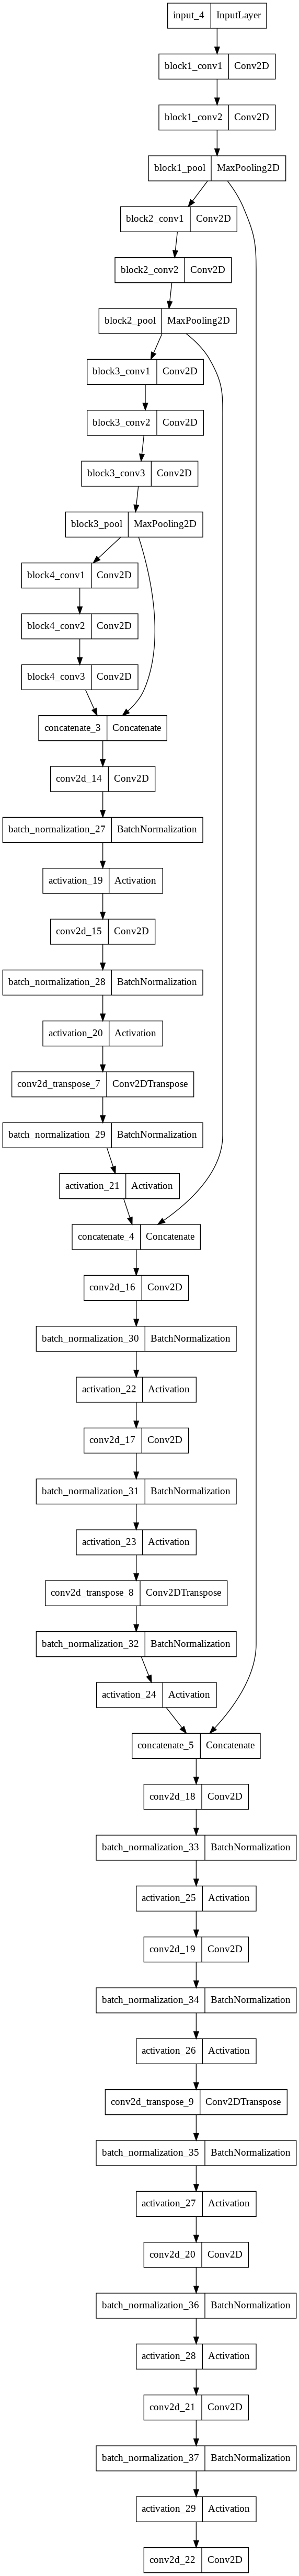

In [ ]:
model_2 = unet_pre_train(num_classes=14, input_shape=(200, 600, 3))

plot_model(model_2, to_file='model_2.png')

In [ ]:
model_2.compile(optimizer=Adam(),
                loss='categorical_crossentropy',
                metrics=[dice_coef])
model_2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 200, 600, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 200, 600, 64  1792        ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 200, 600, 64  36928       ['block1_conv1[0][0]']           
                                )                                                           

(1, 200, 600)


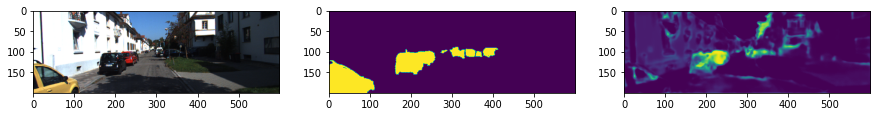


Sample Prediction after epoch 30
13/13 [==============================] - 5s 380ms/step - loss: 0.5437 - dice_coef: 0.7333 - val_loss: 1.3652 - val_dice_coef: 0.5037


In [ ]:
history = model_2.fit(X_train, y_train,
                      epochs=30,
                      batch_size=1,
                      validation_data=(X_test, y_test),
                      callbacks=[DisplayCallback()])

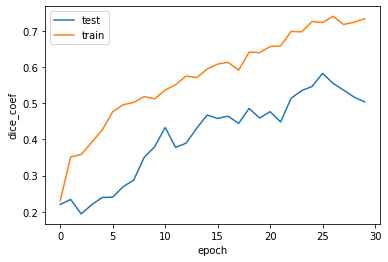

In [ ]:
plt.plot(history.history['val_dice_coef'], label='test')
plt.plot(history.history['dice_coef'], label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('dice_coef')
plt.show()

**Распознаём тестовую выборку**

In [ ]:
pred = model_2.predict(X_test)
print(pred.shape)

(4, 200, 600, 14)


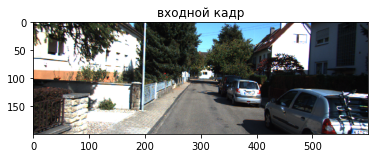

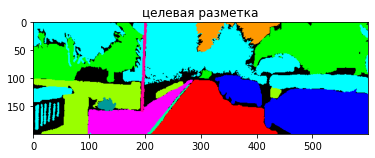

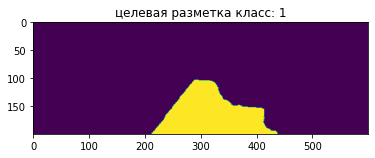

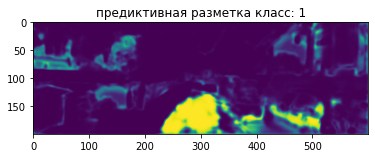

In [ ]:
n = 1
class_ = 1
plt.imshow(images[N + n].convert('RGBA'))
plt.title('входной кадр')
plt.show()
plt.imshow(masks[N + n].convert('RGBA'))
plt.title('целевая разметка')
plt.show()
img = y_test[n][..., class_]
plt.imshow(img)
plt.title('целевая разметка класс: ' + str(class_))
plt.show()
img = pred[n][..., class_]
plt.imshow(img)
plt.title('предиктивная разметка класс: ' + str(class_))
plt.show()

https://www.kaggle.com/julichitai/carvana-cars-segmentation

## Домашнее задание

1. Попробуйте обучить нейронную сеть U-Net на любом другом датасете. Можете взять один из этих наборов данных:
    - https://www.kaggle.com/carlolepelaars/camvid
    - https://www.kaggle.com/dansbecker/cityscapes-image-pairs
    - https://www.kaggle.com/tapakah68/segmentation-full-body-mads-dataset
    - https://www.kaggle.com/longnguyen2306/bacteria-detection-with-darkfield-microscopy
    - https://www.kaggle.com/nikhilpandey360/chest-xray-masks-and-labels
2. Опишите в комментарии - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

## Дополнительные материалы

1. [Оригинальная научная статья по FCN](https://arxiv.org/pdf/1411.4038.pdf)
2. [Оригинальная научная статья по SegNet](https://arxiv.org/pdf/1511.00561.pdf)
3. [Оригинальная научная статья по U-Net](https://arxiv.org/pdf/1505.04597.pdf)
4. [Оригинальная научная статья по FPN](https://arxiv.org/pdf/1612.03144.pdf)
5. [Научная статья с обзором отрасли сегментации изображений с помощью глубокого обучения](https://arxiv.org/pdf/2001.05566.pdf)
6. [Сегментация изображений с помощью нейросетей](https://youtu.be/OWK8VlgJM4I)
7. [Metrics to Evaluate your Semantic Segmentation Model](https://towardsdatascience.com/metrics-to-evaluate-your-semantic-segmentation-model-6bcb99639aa2)
8. [Writing your own callbacks](https://keras.io/guides/writing_your_own_callbacks/)


## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://www.tensorflow.org/tutorials/images/segmentation</li>
    <li>Image Segmentation Using Deep Learning: A Survey. Shervin Minaee и др. 15 Jan 2020</li>
    <li>https://blog.athelas.com/a-brief-history-of-cnns-in-image-segmentation-from-r-cnn-to-mask-r-cnn-34ea83205de4</li>
    <li>Википедия</li>  
</ol>

## Определения

**Сегментация** — это процесс разделения изображения на несколько сегментов (множество пикселей).

**Semantic segmentation** — определение всех пикселей объектов определённого класса или фона на изображении. Если несколько объектов одного класса перекрываются, их пиксели никак не отделяются друг от друга.

**Instance segmentation** — определение пикселей, принадлежащих каждому объекту каждого класса по отдельности.

**Автоэнкодеры** — это нейронные сети прямого распространения, которые восстанавливают входной сигнал на выходе. Внутри у них имеется скрытый слой, который представляет собой описательное представление картинки.